In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
planes = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/planes.csv")
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


<!-- # `Series.dtype` & `df.dtypes` -->
## Storing pandas Series with a `dtype` of `categorical`

In [3]:
adult = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/adult.csv")
adult.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
print(adult.dtypes, '\n')
# By default, columns containing strings are not stored using pandas' category dtype, 
# as not every column containing strings needs to be categorical.
print(adult["Marital Status"].dtype, '\n') # adult["Marital Status"].dtype = adult["Marital Status"].dtypes

# We can convert this to the categorical dtype using the astype method and specifying category
adult["Marital Status"] = adult["Marital Status"].astype("category")
print(adult["Marital Status"].dtype)
adult["Marital Status"].dtype
# The variable is now saved as categorical and there is a list of the categories found in the Series. 
# ordered equals false => indicates there is currently no order for these categories.

Age                   int64
Workclass            object
fnlgwt                int64
Education            object
Education Num         int64
Marital Status     category
Occupation           object
Relationship         object
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k      object
dtype: object 

category 

category


CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False, categories_dtype=object)

In [31]:
# There are two ways to create a categorical pandas Series when your data is not already in a DataFrame format
data = ['A', 'A', 'C', 'B', 'C', 'A']
# the 1st way
series1 = pd.Series(data, dtype="category")
print(series1, '\n')

# the 2nd way: it allows us to tell pandas that the categories have a logical order
series2 = pd.Categorical(data, categories=['B', 'A', 'C'], ordered=True) # `categories` arg takes the ascending order of your categories
series2

0    A
1    A
2    C
3    B
4    C
5    A
dtype: category
Categories (3, object): ['A', 'B', 'C'] 



['A', 'A', 'C', 'B', 'C', 'A']
Categories (3, object): ['B' < 'A' < 'C']

### Why is storing pandas Series with a `dtype` of `categorical` useful?
**It's a huge memory saver**

→ If you know the data types of columns before reading in a dataset, it is good practice to specify at least some of the column dtypes. This can be done by creating a dictionary with column names as keys and data types as values.
-   `pd.read_csv("file.csv", parse_dates=["DateTimeVariable1"], dtype={"VaribleName1": "Type1"})`

<br>

##### Why is there such a significant difference in memory usage?
The huge difference in memory usage between an object type and a category type for the "Marital Status" column in the `adult` DataFrame is due to how these data types are stored internally in pandas.

1. **Object Type**: When a column is of type `object`, each value is stored as a Python string. This means that each unique string is stored separately in memory, along with its metadata. Strings in Python are generally more memory-intensive because they include overhead for the string object itself, along with the actual string data.

2. **Category Type**: When a column is of type `category`, pandas stores the unique values of the column (the categories) only once. It then uses integer codes to represent these categories in the actual data array. This drastically reduces the memory footprint because:
	- The unique strings (categories) are stored only once.
	- The actual data array consists of integer codes, which are much more memory-efficient.

<br>

**N.B.** The number of bytes needed for a categorical column is proportional to the number of unique categories

In [6]:
print(adult["Marital Status"].astype("object").nbytes, '\n') 
print(adult["Marital Status"].astype("category").nbytes, '\n')  
# In this example, using a categorical dtype reduced the memory footprint by a factor of eight.

260488 

32617 



In [7]:
# return the memory usage in bytes
print(adult["Marital Status"].astype("object").memory_usage(), '\n') 
print(adult["Marital Status"].astype("category").memory_usage(), '\n')  

260620 

33049 



In [8]:
# The memory footprint of `object` values is ignored by default.
# When deep=True is specified, the method performs a deeper introspection of the memory usage. 
# This includes the memory consumed by the objects themselves (e.g., the strings in the columns).
# This is crucial for accurately measuring memory usage when dealing with data types like object or string, 
# which may contain complex objects (like strings) that consume more memory than the basic data types (like integers or floats)
print(adult["Marital Status"].astype("object").memory_usage(deep=True), '\n') 
print(adult["Marital Status"].astype("category").memory_usage(deep=True), '\n')    

2097518 

33436 



In [9]:
# Notice that `.info()` calculates consumed bytes as `.memory_usage()` does
print(adult["Marital Status"].astype("object").info(), '\n') 
print(adult["Marital Status"].astype("category").info(), '\n')    

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: Marital Status
Non-Null Count  Dtype 
--------------  ----- 
32561 non-null  object
dtypes: object(1)
memory usage: 254.5+ KB
None 

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: Marital Status
Non-Null Count  Dtype   
--------------  -----   
32561 non-null  category
dtypes: category(1)
memory usage: 32.3 KB
None 



# The `.cat` accessor object
This object let's us access and manipulate the categories of a categorical Series. Most of the methods we will introduce use the following parameters: 
-   `new-categories`: a list of new categories for the Series
-   `inplace`: a Boolean value for whether or not the method should overwrite the current Series
-   `ordered`: a Boolean for whether or not the new Series should be treated as an ordered categorical or not

In [ ]:
category_columns = ["coat", "sex", "color", "size", "likes_people", "likes_children", "keep_in", "breed"]
dtype_category_mapping = dict().fromkeys(category_columns, 'category')

dogs = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/ShelterDogs.csv", \
		      parse_dates=["date_found"], \
		      dtype=dtype_category_mapping)
dogs.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_20852\140116557.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dogs = pd.read_csv(r"D:\Courses\DataCamp\Associate Data Scientist in Python\Courses' Datasets\ShelterDogs.csv", \


,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Setting Series categories

In [11]:
# We are setting the dropna parameter to false to check for any missing entries
print(dogs["coat"].value_counts(dropna=False), '\n')

# Any values not listed in the new-categories list will be dropped.
# the Series now knows the categories have a specific order
dogs["coat"] = dogs["coat"].cat.set_categories(new_categories=["short", "medium", "long"], ordered=True)
print(dogs["coat"].value_counts(dropna=False), '\n')

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64 

coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64 



### Adding Categories

In [12]:
# n the likes-people column, there are 938 rows without a response. 
# Maybe the dog shelter did not check (Truly unknown), or maybe they checked and could not tell (Not sure, dog likes "some" people). 
# Let's add a couple of categories to clean this up.
dogs["likes_people"].value_counts(dropna=False)

likes_people
yes    1991
NaN     938
no        8
Name: count, dtype: int64

In [13]:
dogs["likes_people"] = dogs["likes_people"].cat.add_categories(new_categories=["did not check", "could not tell"])
print(dogs["likes_people"].cat.categories, '\n')

# this doesn't mean any rows of our data were set to these new categories.
dogs["likes_people"].value_counts(dropna=False)

Index(['no', 'yes', 'did not check', 'could not tell'], dtype='object') 



likes_people
yes               1991
NaN                938
no                   8
did not check        0
could not tell       0
Name: count, dtype: int64

### Removing Categories

In [14]:
# This means that all wirehaired values will be set to NaN values
# dogs["coat"] = dogs["coat"].cat.remove_categories(removals=["wirehaired"])
# dogs["coat"].value_counts(dropna=False)

# ------------------------------------------

# We can drop false categories by storing the right ones somewhere (maybe in a Series of a DataFrame called 'categories')
""" Example:
# It's always good practice to keep a log of all possible values of your categorical data
categories = pd.DataFrame(
	'blood_type': ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']
)

# Dropping Inconsistent Categories. Notice that `set()` returns the unique values
# The line below equals: set(study_data['blood_type']) - set(categories['blood_type']) → left anti join
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type']) 
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
consistent_data = study_data[~inconsistent_rows]
"""

" Example:\n# It's always good practice to keep a log of all possible values of your categorical data\ncategories = pd.DataFrame(\n\t'blood_type': ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']\n)\n\n# Dropping Inconsistent Categories. Notice that `set()` returns the unique values\n# The line below equals: set(study_data['blood_type']) - set(categories['blood_type']) → left anti join\ninconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type']) \ninconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)\nconsistent_data = study_data[~inconsistent_rows]\n"

### Renaming Categories

In [15]:
dogs["breed"].value_counts(dropna=False)

breed
Unknown Mix                                 1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: count, Length: 277, dtype: int64

In [16]:
dogs["breed"] = dogs["breed"].cat.rename_categories({"Unknown Mix":"Unknown"})
dogs["breed"].value_counts(dropna=False)

# renaming with a function
print(dogs["sex"].value_counts(dropna=False), '\n')
dogs["sex"] = dogs["sex"].cat.rename_categories(lambda x: x.title())
dogs["sex"].value_counts(dropna=False)

# ISSUE:
# we cannot use this method to collapse categories into one
# dogs["breed"] = dogs["breed"].cat.rename_categories({"Unknown Mix":"Unknown", "Mixed Breed":"Unknown"})
# Does not work! New names must be unique

sex
male      1681
female    1256
Name: count, dtype: int64 



sex
Male      1681
Female    1256
Name: count, dtype: int64

### Collapsing & Updating Categories

In [17]:
# Dog hair can be many different colors. 
# It might make sense for us to make a new categorical column that just has a dog's main or primary color, 
# instead of all of the combinations of colors.
dogs["color"].value_counts(dropna=False)

color
black              620
brown              293
black and brown    287
yellow-brown       212
black and white    190
black and tan      155
apricot            142
brown and white    124
white              124
sable              118
tricolor            99
saddle back         91
striped             89
gray                64
yellow              63
golden              61
red                 53
spotty              47
gray and white      35
gray and black      28
wild boar           18
red and white       14
dotted              10
Name: count, dtype: int64

In [18]:
# This method does not use the `.cat` accessor object
# We can also use `.map()` here
dogs["color"] = dogs["color"].replace({"black and brown": "black", "black and tan": "black", "black and white": "black"})
dogs["color"].dtype

C:\Users\moham\AppData\Local\Temp\ipykernel_20852\4092843654.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dogs["color"] = dogs["color"].replace({"black and brown": "black", "black and tan": "black", "black and white": "black"})


CategoricalDtype(categories=['apricot', 'black', 'brown', 'brown and white', 'dotted',
                  'golden', 'gray', 'gray and black', 'gray and white', 'red',
                  'red and white', 'sable', 'saddle back', 'spotty', 'striped',
                  'tricolor', 'white', 'wild boar', 'yellow', 'yellow-brown'],
, ordered=False, categories_dtype=object)

### Reordering categories for display purposes

##### Why?

1. Creating an ordinal variable

2. To set the order that variables are displayed in analysis

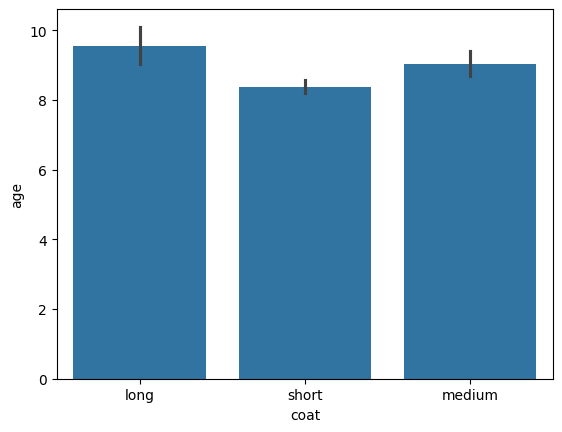

C:\Users\moham\AppData\Local\Temp\ipykernel_20852\4287866559.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dogs.groupby("coat")["age"].mean(), '\n')


coat
long      9.552056
short     8.364746
medium    9.027982
Name: age, dtype: float64 



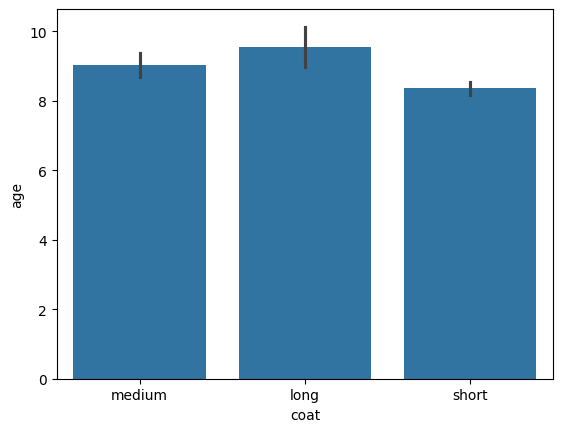

C:\Users\moham\AppData\Local\Temp\ipykernel_20852\4287866559.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dogs.groupby("coat")["age"].mean(), '\n')


coat
medium    9.027982
long      9.552056
short     8.364746
Name: age, dtype: float64 



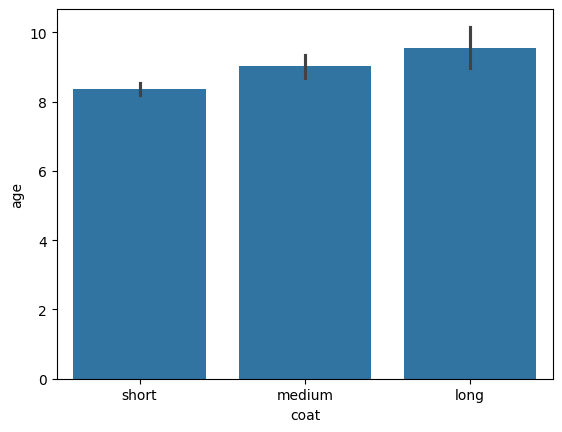

coat
short     8.364746
medium    9.027982
long      9.552056
Name: age, dtype: float64 



C:\Users\moham\AppData\Local\Temp\ipykernel_20852\4287866559.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(dogs.groupby("coat")["age"].mean(), '\n')


In [19]:
# Instead of setting `ordered` to `False`, we may not pass the arg originally
dogs["coat"] = dogs["coat"].cat.reorder_categories(new_categories=["long", "short", "medium"], ordered=False)
sns.barplot(data=dogs, x="coat", y="age")
plt.show()
print(dogs.groupby("coat")["age"].mean(), '\n')

dogs["coat"] = dogs["coat"].cat.reorder_categories(new_categories=["medium", "long", "short"], ordered=False)
sns.barplot(data=dogs, x="coat", y="age")
plt.show()
print(dogs.groupby("coat")["age"].mean(), '\n')

# `ordered` = `True` : Now, pandas knows that the variable `coat` has a natural order (ordinal)
dogs["coat"] = dogs["coat"].cat.reorder_categories(new_categories=["short", "medium", "long"], ordered=True)
sns.barplot(data=dogs, x="coat", y="age")
plt.show()
print(dogs.groupby("coat")["age"].mean(), '\n')

# Note that the `value_counts()` method does not automatically use the categorical order when printing results;
# however, we can use the `sort` parameter, `value_counts(sort=False)`, so that the output will be ordered by the order of the category.

# Possible issues with categorical data

-   Inconsistent values: "Ham", "ham", " Ham"

	-   Capitalization and white spaces are common culprits here and these issues may occur when appending different data sources or columns. 

-   Misspelled values: "Ham", "Hma"

	-   Spelling issues can cause big problems. This occurs frequently in surveys or online forms when the field is left to the user to fill out.

-   Wrong `dtype`: `df["categorical col"].dtype` outputs `object` 

	-   If we do make corrections, we need to make sure our column `dtype` remains `category`, and is not changed to an `object`.

### Identifying Issues

Use either `Series.cat.categories` OR `Series.value_counts(dropna=False)` 

Then, ... <br>
Fortunately, we have the same resources available for fixing categorical values that we do for fixing strings.

`Series.str.strip()` → fixing white leading and trailing spaces <br>

`Series.str.lower()/upper()/title()` → fixing capitalization <br>

`Series.replace(dict)` → fixing misspelled words <br>

In [20]:
# We notice 3 issues. Varying capitalization, leading white spaces, and misspellings
dogs["get_along_cats"].value_counts(dropna=False)

get_along_cats
NaN    2502
yes     275
no      155
Noo       2
No        1
NO        1
 No       1
Name: count, dtype: int64

In [21]:
dogs["get_along_cats"] = dogs["get_along_cats"].str.strip()
dogs["get_along_cats"].value_counts(dropna=False)

get_along_cats
NaN    2502
yes     275
no      155
No        2
Noo       2
NO        1
Name: count, dtype: int64

In [22]:
dogs["get_along_cats"] = dogs["get_along_cats"].str.title()
dogs["get_along_cats"].value_counts(dropna=False)

get_along_cats
NaN    2502
Yes     275
No      158
Noo       2
Name: count, dtype: int64

In [23]:
dogs["get_along_cats"] = dogs["get_along_cats"].replace({"Noo":"No"})
dogs["get_along_cats"].value_counts(dropna=False)

get_along_cats
NaN    2502
Yes     275
No      160
Name: count, dtype: int64

In [34]:
# We can write all the cleaning code in the previous 3 cells in just one line ↓↓
# dogs["get_along_cats"] = dogs["get_along_cats"].str.strip().str.title().replace({"Noo":"No"})

# After the cleaning we've made, we should check our Series `dtype`
print(dogs["get_along_cats"].dtype) # outputs: dtype('O') => 'O' = 'object'

# so, we should convert it again to the 'category' dtype
dogs["get_along_cats"] = dogs["get_along_cats"].astype("category")

object


# Filtering categorical data with `Series.str`

In [25]:
# We are setting the regex parameter to false in this example so that we use string matching and not a regular expression
dogs[dogs["breed"].str.contains("Shepherd", regex=False)].shape[0] # number of dogs that hold a certain condition

284

# Common Pitfalls of the "category" `dtype`
-   Using the `.str` accessor to manipulate data of "category" `dtype` converts the Series to an "object"
	-   `Series = Series.astype("category")`

-   The `.apply()` method outputs a new Series as an object Solution: 
	-   `Series = Series.astype("category")`

-   Numpy functions generally don't work with categorical Series
	-   For example, if `hotels["stars"]` is a categorical Series, then `hotels["stars"].sum()` may give an error

		-   Solution: `hotels["stars"].astype(int).sum()`